In [5]:
import numpy as np
import pandas as pd
import os

In [11]:
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import splitfolders

In [7]:
def summarize_diagnostics(history):
# plot loss
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="upper left")
    # plot accuracy
    plt.style.use("ggplot")
    plt.figure()
    N = epochs
    plt.plot(np.arange(0, N), history.history["accuracy"], label="accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")
    # save plot to file

In [8]:
'../data/casting_defects/casting_512x512/def_front'

'../data/casting_defects/casting_512x512/def_front'

In [9]:
print("Class ok_front train count:",len(os.listdir('../data/casting_defects/casting_data/train/ok_front')))
print("Class def_front train count:",len(os.listdir('../data/casting_defects/casting_data/train/def_front')) )

print("Class ok_front test count:",len(os.listdir('../data/casting_defects/casting_data/test/ok_front')))
print("Class def_front test count:",len(os.listdir('../data/casting_defects/casting_data/test/def_front')) )

Class ok_front train count: 2875
Class def_front train count: 3758
Class ok_front test count: 262
Class def_front test count: 453


In [13]:
splitfolders.ratio("../data/casting_defects/casting_data/train", output="output", seed=1337, ratio=(.9, .1), group_prefix=None)


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:01,  1.11s/ files]
Copying files: 10 files [00:01,  1.28 files/s]
Copying files: 19 files [00:01,  1.82 files/s]
Copying files: 27 files [00:01,  2.57 files/s]
Copying files: 35 files [00:01,  3.62 files/s]
Copying files: 43 files [00:01,  5.07 files/s]
Copying files: 51 files [00:01,  7.04 files/s]
Copying files: 61 files [00:01,  9.74 files/s]
Copying files: 70 files [00:01, 13.30 files/s]
Copying files: 79 files [00:02, 17.77 files/s]
Copying files: 88 files [00:02, 23.19 files/s]
Copying files: 97 files [00:02, 29.38 files/s]
Copying files: 105 files [00:02, 36.03 files/s]
Copying files: 113 files [00:02, 42.70 files/s]
Copying files: 121 files [00:02, 49.26 files/s]
Copying files: 129 files [00:02, 55.10 files/s]
Copying files: 137 files [00:02, 60.49 files/s]
Copying files: 145 files [00:02, 63.28 files/s]
Copying files: 153 files [00:03, 63.67 files/s]
Copying files: 161 files [00:03, 65.55 files/s]
Copying fi

Copying files: 1353 files [00:18, 72.15 files/s]
Copying files: 1361 files [00:18, 69.52 files/s]
Copying files: 1369 files [00:18, 72.02 files/s]
Copying files: 1377 files [00:18, 68.89 files/s]
Copying files: 1386 files [00:19, 73.78 files/s]
Copying files: 1396 files [00:19, 78.52 files/s]
Copying files: 1406 files [00:19, 82.00 files/s]
Copying files: 1416 files [00:19, 84.49 files/s]
Copying files: 1425 files [00:19, 81.19 files/s]
Copying files: 1434 files [00:19, 75.78 files/s]
Copying files: 1442 files [00:19, 71.73 files/s]
Copying files: 1451 files [00:19, 74.59 files/s]
Copying files: 1459 files [00:19, 74.11 files/s]
Copying files: 1467 files [00:20, 73.73 files/s]
Copying files: 1476 files [00:20, 77.75 files/s]
Copying files: 1485 files [00:20, 80.98 files/s]
Copying files: 1495 files [00:20, 84.02 files/s]
Copying files: 1504 files [00:20, 79.91 files/s]
Copying files: 1513 files [00:20, 78.10 files/s]
Copying files: 1521 files [00:20, 75.39 files/s]
Copying files: 1530 

Copying files: 2804 files [00:35, 83.87 files/s]
Copying files: 2814 files [00:35, 85.99 files/s]
Copying files: 2824 files [00:35, 87.65 files/s]
Copying files: 2833 files [00:36, 87.52 files/s]
Copying files: 2843 files [00:36, 88.49 files/s]
Copying files: 2853 files [00:36, 89.65 files/s]
Copying files: 2863 files [00:36, 90.29 files/s]
Copying files: 2873 files [00:36, 85.52 files/s]
Copying files: 2882 files [00:36, 83.41 files/s]
Copying files: 2891 files [00:36, 83.52 files/s]
Copying files: 2901 files [00:36, 85.68 files/s]
Copying files: 2910 files [00:36, 86.83 files/s]
Copying files: 2919 files [00:37, 87.49 files/s]
Copying files: 2929 files [00:37, 88.50 files/s]
Copying files: 2939 files [00:37, 89.39 files/s]
Copying files: 2948 files [00:37, 89.40 files/s]
Copying files: 2957 files [00:37, 85.19 files/s]
Copying files: 2966 files [00:37, 81.98 files/s]
Copying files: 2975 files [00:37, 82.05 files/s]
Copying files: 2984 files [00:37, 82.49 files/s]
Copying files: 2994 

Copying files: 4290 files [00:53, 83.78 files/s]
Copying files: 4299 files [00:53, 84.62 files/s]
Copying files: 4309 files [00:53, 87.10 files/s]
Copying files: 4318 files [00:54, 87.36 files/s]
Copying files: 4327 files [00:54, 87.79 files/s]
Copying files: 4337 files [00:54, 89.11 files/s]
Copying files: 4347 files [00:54, 89.93 files/s]
Copying files: 4357 files [00:54, 87.27 files/s]
Copying files: 4366 files [00:54, 84.41 files/s]
Copying files: 4375 files [00:54, 83.60 files/s]
Copying files: 4385 files [00:54, 86.70 files/s]
Copying files: 4395 files [00:54, 88.72 files/s]
Copying files: 4404 files [00:55, 88.94 files/s]
Copying files: 4413 files [00:55, 89.18 files/s]
Copying files: 4422 files [00:55, 89.10 files/s]
Copying files: 4432 files [00:55, 89.97 files/s]
Copying files: 4442 files [00:55, 87.53 files/s]
Copying files: 4451 files [00:55, 85.29 files/s]
Copying files: 4460 files [00:55, 83.90 files/s]
Copying files: 4469 files [00:55, 83.74 files/s]
Copying files: 4479 

Copying files: 5765 files [01:11, 86.30 files/s]
Copying files: 5774 files [01:11, 86.71 files/s]
Copying files: 5783 files [01:11, 83.91 files/s]
Copying files: 5792 files [01:11, 81.21 files/s]
Copying files: 5801 files [01:11, 80.39 files/s]
Copying files: 5810 files [01:11, 79.19 files/s]
Copying files: 5818 files [01:11, 78.70 files/s]
Copying files: 5827 files [01:11, 81.33 files/s]
Copying files: 5837 files [01:11, 84.09 files/s]
Copying files: 5847 files [01:11, 86.28 files/s]
Copying files: 5856 files [01:12, 86.93 files/s]
Copying files: 5865 files [01:12, 84.01 files/s]
Copying files: 5874 files [01:12, 81.71 files/s]
Copying files: 5883 files [01:12, 80.73 files/s]
Copying files: 5892 files [01:12, 79.77 files/s]
Copying files: 5901 files [01:12, 78.31 files/s]
Copying files: 5911 files [01:12, 81.77 files/s]
Copying files: 5920 files [01:12, 83.53 files/s]
Copying files: 5930 files [01:12, 86.29 files/s]
Copying files: 5940 files [01:13, 87.50 files/s]
Copying files: 5949 

In [14]:
print("Class ok_front train count:",len(os.listdir('./output/train/ok_front')))
print("Class def_front train count:",len(os.listdir('./output/train/def_front')) )

print("Class ok_front train count:",len(os.listdir('./output/val/ok_front')))
print("Class def_front train count:",len(os.listdir('./output/val/def_front')) )

Class ok_front train count: 2587
Class def_front train count: 3382
Class ok_front train count: 288
Class def_front train count: 376


In [15]:
IMAGE_DIMS = (224, 224, 3)
train_data_dir = './output/train/'
validation_data_dir = './output/val/'
batch_size=64

In [16]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 5969 images belonging to 2 classes.
Found 664 images belonging to 2 classes.


In [17]:
nb_train_samples =5969 
nb_validation_samples = 664

In [18]:
# define cnn model
def define_model(h,w):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same', input_shape=(h,w, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
    padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    return model

In [19]:
model = define_model(IMAGE_DIMS[0],IMAGE_DIMS[1])
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
epochs = 8
batch_size = 64
checkpoint = ModelCheckpoint("./weights.h5",monitor="loss",mode="min",save_best_only = True,verbose=1)
callbacks = [checkpoint]
history = model.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
93/93 [==============================] - ETA: 0s - loss: 7.8180 - accuracy: 0.6064
Epoch 00001: loss improved from inf to 7.81801, saving model to ./weights.h5
93/93 [==============================] - 256s 3s/step - loss: 7.8180 - accuracy: 0.6064 - val_loss: 0.5766 - val_accuracy: 0.7281
Epoch 2/8
93/93 [==============================] - ETA: 0s - loss: 0.5211 - accuracy: 0.7358
Epoch 00002: loss improved from 7.81801 to 0.52107, saving model to ./weights.h5
93/93 [==============================] - 254s 3s/step - loss: 0.5211 - accuracy: 0.7358 - val_loss: 0.5078 - val_accuracy: 0.7672
Epoch 3/8
93/93 [==============================] - ETA: 0s - loss: 0.4737 - accuracy: 0.7607
Epoch 00003: loss improved from 0.52107 to 0.47370, saving model to ./weights.h5
93/93 [==============================] - 249s 3s/step - loss: 0.4737 - accuracy: 0.7607 - val_loss: 0.4879 - val_accuracy: 0.7750
Epoch 4/8
93/93 

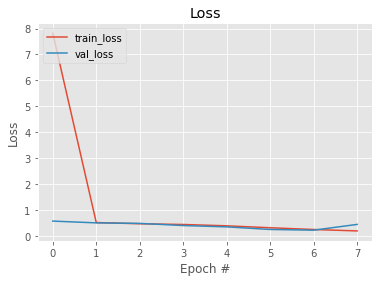

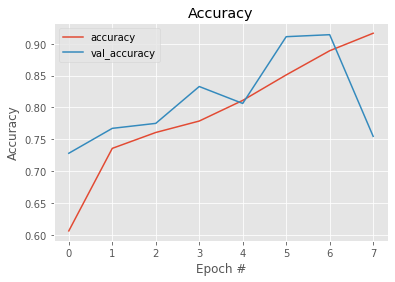

In [20]:
summarize_diagnostics(history)

In [21]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data_dir='../data/casting_defects/casting_data/test/'
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(IMAGE_DIMS[0], IMAGE_DIMS[1]),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 715 images belonging to 2 classes.


In [23]:
model.load_weights("weights.h5")
class_labels = test_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

KeyboardInterrupt: 

In [24]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(test_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

Confusion Matrix


NameError: name 'y_pred' is not defined

In [26]:
2*925*57*34000

3585300000